In [ ]:
# !pip install --upgrade --force-reinstall numpy==1.26.4

In [ ]:
# !pip install --upgrade --force-reinstall pmdarima

In [ ]:
import numpy as np
# print(numpy.__version__)

In [ ]:
# !pip install --upgrade --force-reinstall numpy==1.26.4

In [ ]:
# pip show numpy

In [ ]:
import numpy as np
import pandas as pd
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#!/bin/bash
!kaggle datasets download meetnagadia/apple-stock-price-from-19802021

Dataset URL: https://www.kaggle.com/datasets/meetnagadia/apple-stock-price-from-19802021
License(s): ODbL-1.0
apple-stock-price-from-19802021.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/apple-stock-price-from-19802021.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

Load Dataset

In [ ]:
df = pd.read_csv('/content/AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
df.shape

(10468, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10468.000000,10468.000000,10468.000000,10468.000000,10468.000000,1.046800e+04
mean,14.757987,14.921491,14.594484,14.763533,14.130431,3.308489e+08
std,31.914174,32.289158,31.543959,31.929489,31.637275,3.388418e+08
min,0.049665,0.049665,0.049107,0.049107,0.038329,0.000000e+00
25%,0.283482,0.289286,0.276786,0.283482,0.235462,1.237768e+08
50%,0.474107,0.482768,0.465960,0.475446,0.392373,2.181592e+08
75%,14.953303,15.057143,14.692589,14.901964,12.835269,4.105794e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,7.421641e+09


In [ ]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


Converting date column to date-time dtype

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

Adding new features

In [ ]:
def add_features(data):
    # Add day of the week feature
    data['day_of_week'] = data['Date'].dt.dayofweek

    # Add month feature
    data['month'] = data['Date'].dt.month

    # Add quarter feature
    data['quarter'] = data['Date'].dt.quarter

    # Add year feature
    data['year'] = data['Date'].dt.year

    # Add week of the year feature
    data['week_of_year'] = data['Date'].dt.isocalendar().week

    # Add day of the year feature
    data['day_of_year'] = data['Date'].dt.dayofyear

    # Add lagged features
    # .shift(n) shifts the column downward by n rows ( We are using past 5 days of data)
    data['lag_1'] = data['Close'].shift(1)
    data['lag_2'] = data['Close'].shift(2)
    data['lag_3'] = data['Close'].shift(3)
    data['lag_4'] = data['Close'].shift(4)
    data['lag_5'] = data['Close'].shift(5)

    return data

In [ ]:
# Apply the function to the data
df = add_features(df)

# Drop rows with missing values
df.dropna(inplace=True)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day_of_week,month,quarter,year,week_of_year,day_of_year,lag_1,lag_2,lag_3,lag_4,lag_5
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.098436,48630400,4,12,4,1980,51,354,0.118862,0.115513,0.112723,0.121652,0.128348
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.103227,37363200,0,12,4,1980,52,357,0.126116,0.118862,0.115513,0.112723,0.121652
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.107583,46950400,1,12,4,1980,52,358,0.132254,0.126116,0.118862,0.115513,0.112723
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.113245,48003200,2,12,4,1980,52,359,0.137835,0.132254,0.126116,0.118862,0.115513
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.123699,55574400,4,12,4,1980,52,361,0.145089,0.137835,0.132254,0.126116,0.118862


Exploratory Data Analysis (EDA)

<Figure size 1000x600 with 0 Axes>

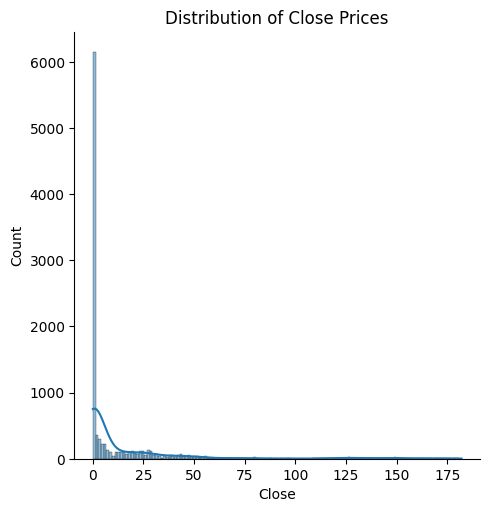

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))

# Distribution of the target variable
sns.displot(data=df, x='Close', kde=True)
plt.title('Distribution of Close Prices')
plt.show()

# Majority of close pricces are in range 0 - 35, Highly right skewed data

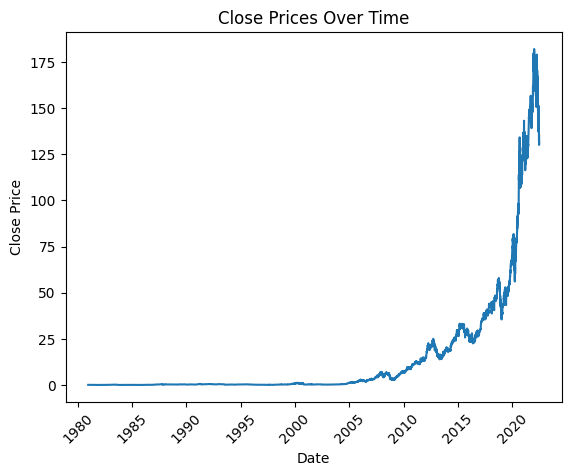

'\nShows the trend of close prices\nSignificant uptrend since 2015\n'

In [ ]:
# Line plot of close prices over time
sns.lineplot(data=df, x='Date', y='Close')
plt.title('Close Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

"""
Shows the trend of close prices
Significant uptrend since 2015
"""

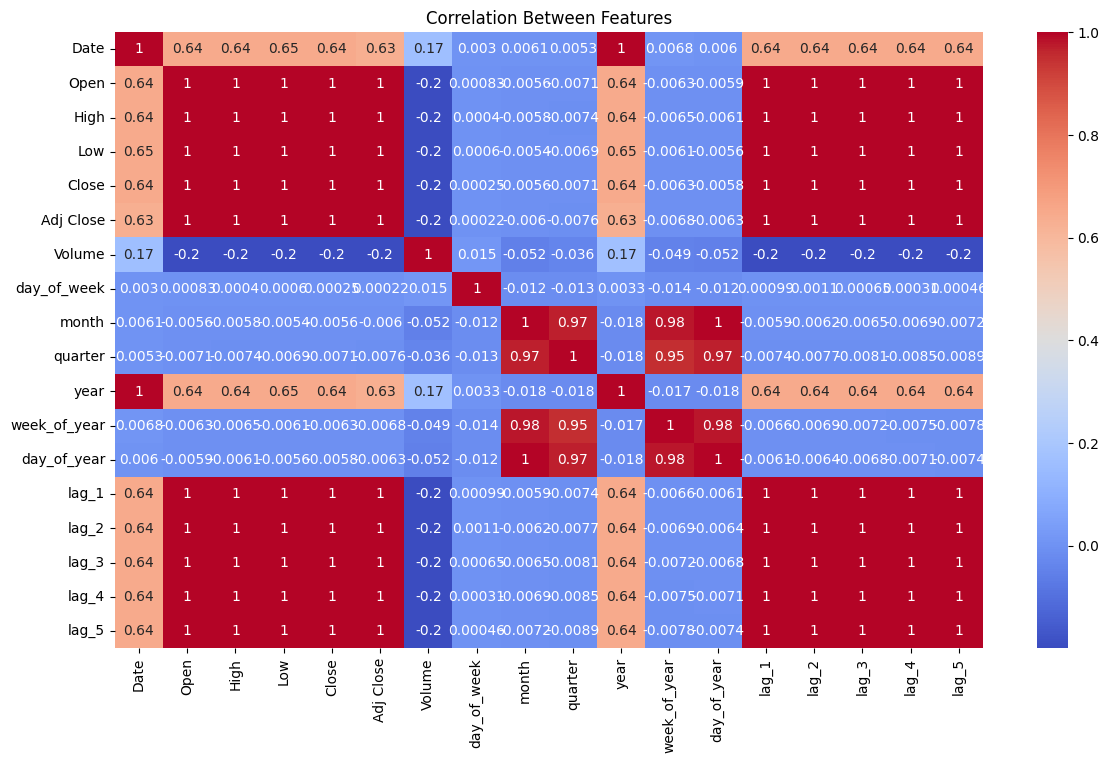

'\nIndicates that the Close Price has a strong positive correlation with Open, High, Low, and Adj Close prices, but a weak negative correlation with Volume\nAlso indicates that the Open, High, Low, and Adj Close prices are highly correlated with each other\n'

In [ ]:
# Heatmap of correlation between features
plt.figure(figsize=(14,8));
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Between Features')
plt.show()

"""
Indicates that the Close Price has a strong positive correlation with Open, High, Low, and Adj Close prices, but a weak negative correlation with Volume
Also indicates that the Open, High, Low, and Adj Close prices are highly correlated with each other
"""

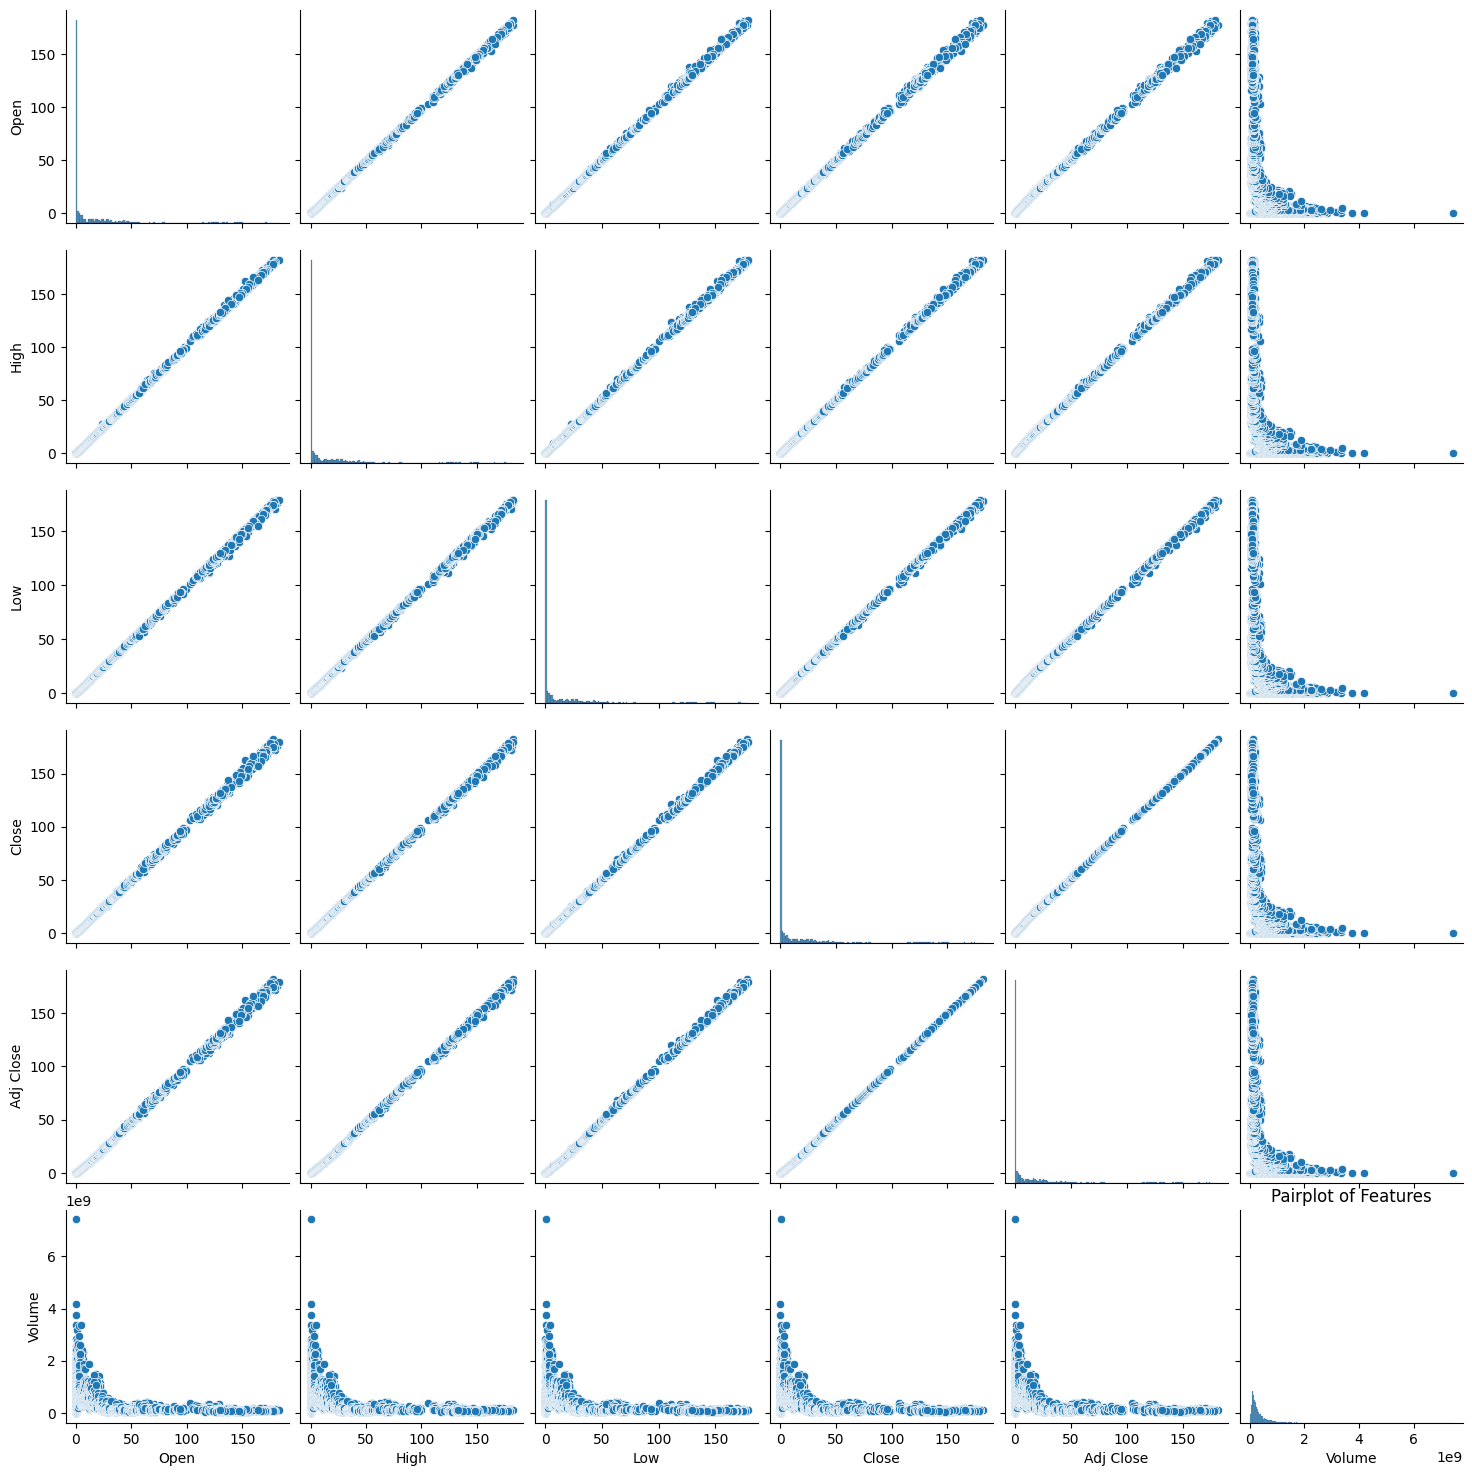

'\nShows pairwise relationships between all features of the dataset\nIndicates that the Open, High, Low, and Close prices are strongly positively correlated with each other, with a linear relationship\nVolume is not highly correlated with any column\n'

In [ ]:
# Pairplot of features
sns.pairplot(data=df, vars=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])
plt.title('Pairplot of Features')
plt.show()

"""
Shows pairwise relationships between all features of the dataset
Indicates that the Open, High, Low, and Close prices are strongly positively correlated with each other, with a linear relationship
Volume is not highly correlated with any column
"""

Creating the Model

In [ ]:
# Prepare features & targets
feature_cols = ['Open', 'High', 'Low', 'Volume',
                'day_of_week', 'month', 'quarter',
                'year', 'week_of_year', 'day_of_year',
                'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']
X = df[feature_cols]

# We have considered "Close" as our target variable which we want to predict
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # no shuffling: preserve time order
)

# Baseline model
# This baseline model will help as the reference model.
# It will predict the same value for all the test samples (mean of close prices)
y_pred_baseline = np.full((len(y_test),), y_train.mean())

# Measures average squared difference between predicted and actual values.
# Lower is better. Sensitive to large errors
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)

# Average of the absolute differences between predicted and actual.
# More robust to outliers than RMSE.
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)

# Shows error as a percentage.
# Useful for interpretability ("On average, our prediction is off by X%").
mape_baseline = np.mean(np.abs((y_test - y_pred_baseline) / y_test)) * 100

# Measures how well predictions approximate actual values.
# Range: 1: perfect predictions, 0: same as always predicting the mean, <0: worse than predicting the mean
r2_baseline = r2_score(y_test, y_pred_baseline)

print('Baseline Model:')
print(f'MSE: {mse_baseline:.2f}')
print(f'RMSE: {rmse_baseline:.2f}')
print(f'MAE: {mae_baseline:.2f}')
print(f'MAPE: {mape_baseline:.2f}%')
print(f'R2 Score: {r2_baseline:.2f}\n')

"""
The values obtained are very high and r2 score is also -ve, which means baseline model is performing very bad
"""

Baseline Model:
MSE: 5721.92
RMSE: 75.64
MAE: 60.39
MAPE: 93.62%
R2 Score: -1.76



'\nThe values obtained are very high and r2 score is also -ve, which means baseline model is performing very bad\n'

Using Linear Regression

In [ ]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mape_lr = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100
r2_lr = r2_score(y_test, y_pred_lr)

print('Linear Regression Model:')
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'MAE: {mae_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')
print(f'R2 Score: {r2_lr:.2f}\n')

'''
errors value are pretty low but r2 score is around 1. This can also be possibly overfitting.
'''

Linear Regression Model:
MSE: 0.33
RMSE: 0.57
MAE: 0.32
MAPE: 0.45%
R2 Score: 1.00



'\nerrors value ar pretty low but r2 score is around 1. This can also be possibly overfitting.\n'

Using Support Vector Regression

In [ ]:
# Support Vector Regression Model
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='linear')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mape_svr = np.mean(np.abs((y_test - y_pred_svr) / y_test)) * 100
r2_svr = r2_score(y_test, y_pred_svr)

print('Support Vector Regression Model:')
print(f'MSE: {mse_svr:.2f}')
print(f'RMSE: {rmse_svr:.2f}')
print(f'MAE: {mae_svr:.2f}')
print(f'MAPE: {mape_svr:.2f}%')
print(f'R2 Score: {r2_svr:.2f}\n')

Support Vector Regression Model:
MSE: 0.91
RMSE: 0.96
MAE: 0.55
MAPE: 0.78%
R2 Score: 1.00



Using Random Forest Regressor

In [ ]:
# Random Forest Regression Model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mape_rf = np.mean(np.abs((y_test - y_pred_rf) / y_test)) * 100
r2_rf = r2_score(y_test, y_pred_rf)

print('Random Forest Regression Model:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')
print(f'R2 Score: {r2_rf:.2f}\n')

Random Forest Regression Model:
MSE: 3526.76
RMSE: 59.39
MAE: 38.37
MAPE: 41.94%
R2 Score: -0.70



LSTM Model

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
len_train_data = int(np.ceil( len(dataset) * .95 ))

print(len_train_data)

''' Taking 95% of the data in training and 5% in testing) '''

9940


' Taking 95% of the data in training and 5% in testing) '

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
trained_scaled_data = scaler.fit_transform(dataset)

trained_scaled_data

array([[4.23217323e-04],
       [4.56949847e-04],
       [4.87621274e-04],
       ...,
       [7.44010911e-01],
       [7.14499102e-01],
       [7.22742631e-01]])

In [ ]:
# Create the scaled training data set
train_data = trained_scaled_data[0:int(len_train_data), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

'''Here we are using the last 60 days data to predict the next one, this data will be feeded in the LSTM model as training and the 61th day data will be used as target.
This is also called sliding the window forward'''

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0.00047229, 0.00051215, 0.00050602,
       0.00047842, 0.00048149, 0.00049682, 0.00049069, 0.00053669,
       0.00051215, 0.00052749, 0.00053669, 0.00053362, 0.00052135,
       0.00051522, 0.00049069, 0.00046309, 0.00042322, 0.00038335,
       0.00040788, 0.00043242, 0.00043242, 0.00043548, 0.00039868,
       0.00039868, 0.00037722, 0.00037108, 0.00035575, 0.00037108,
       0.00039868, 0.00035881, 0.00032508, 0.00033428, 0.00031281,
       0.00034961, 0.00035881, 0.00038029, 0.00038335, 0.00037415,
       0.00036801, 0.00036495, 0.00035881, 0.00030975, 0.00028214,
       0.00026068, 0.00028214, 0.00027601, 0.00029748, 0.00032508])]
[0.00036187996620460543]

[array([0.00042322, 0.00045695, 0.00048762, 0.00052749, 0.00060109,
       0.00061336, 0.00059189, 0.00056736, 0.00057656, 0.00055816,
       0.00052135, 0.00048762, 0

'Here we are using the last 60 days data to predict the next one, this data will be feeded in the LSTM model as training and the 61th day data will be used as target.\nThis is also called sliding the window forward'

In [ ]:
x_train.shape

(9880, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=14)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 7.9632e-04
Epoch 2/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 1.9423e-05
Epoch 3/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.5345e-05
Epoch 4/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0135e-05
Epoch 5/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.8324e-05
Epoch 6/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 2.0552e-05
Epoch 7/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.4218e-05
Epoch 8/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1.2721e-05
Epoch 9/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.1699e-05
Epoch 10/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.2132e-05
Epoch 11/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 1.2104e-05
Epoch 12/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 9.2075e-06
Epoch 13/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 9.9230e-06
Epoch 14/14
309/309 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 8.9649

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = trained_scaled_data[len_train_data - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[len_train_data:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
# Baseline model
mse_lstm = mean_squared_error(y_test, predictions)
rmse_lstm = np.sqrt(mse_lstm)
mae_lstm = mean_absolute_error(y_test, predictions)
mape_lstm = np.mean(np.abs((y_test - predictions) / y_test)) * 100
r2_lstm = r2_score(y_test, predictions)

print('lstm Model:')
print(f'MSE: {mse_lstm:.2f}')
print(f'RMSE: {rmse_lstm:.2f}')
print(f'MAE: {mae_lstm:.2f}')
print(f'MAPE: {mape_lstm:.2f}%')
print(f'R2 Score: {r2_lstm:.2f}\n')

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
lstm Model:
MSE: 32.20
RMSE: 5.67
MAE: 4.90
MAPE: 3.58%
R2 Score: 0.94



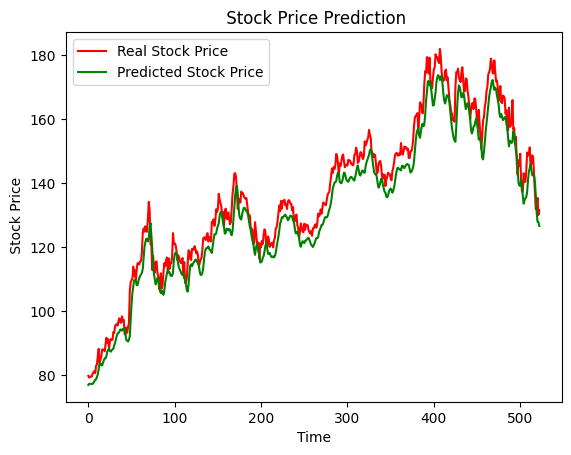

In [ ]:
plt.plot(y_test, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'green', label = 'Predicted Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [ ]:
models = ['Baseline', 'Linear Regression', 'Support Vector Regression', 'Random Forest Regression', 'LSTM']
mse_scores = [mse_baseline, mse_lr, mse_svr, mse_rf, mse_lstm]
rmse_scores = [rmse_baseline, rmse_lr, rmse_svr, rmse_rf, rmse_lstm]
mae_scores = [mae_baseline, mae_lr, mae_svr, mae_rf, mae_lstm]
mape_scores = [mape_baseline, mape_lr, mape_svr, mape_rf, mape_lstm]
r2_scores = [r2_baseline, r2_lr, r2_svr, r2_rf, r2_lstm]

# Create a dataframe to store the evaluation metrics
evaluation_df = pd.DataFrame({'Model': models, 'MSE': mse_scores, 'RMSE': rmse_scores,
                              'MAE': mae_scores, 'MAPE': mape_scores, 'R2 Score': r2_scores})
evaluation_df.set_index('Model', inplace=True)

# Print the evaluation metrics
print(evaluation_df)

                                   MSE       RMSE        MAE       MAPE  \
Model                                                                     
Baseline                   5721.920177  75.643375  60.394289  93.615711   
Linear Regression             0.325618   0.570629   0.315850   0.453531   
Support Vector Regression     0.913904   0.955983   0.554569   0.784789   
Random Forest Regression   3526.759218  59.386524  38.371426  41.939894   
LSTM                         32.197467   5.674281   4.895427   3.582312   

                           R2 Score  
Model                                
Baseline                  -1.758283  
Linear Regression          0.999843  
Support Vector Regression  0.999559  
Random Forest Regression  -0.700094  
LSTM                       0.943041  


Applying ARIMA and SARIMAX

In [ ]:
data = pd.read_csv('AAPL.csv')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
# Neglecting initial values because very less slope initial. Model will not able to understand trends in data
data = data.iloc[4500:].reset_index(drop=True)

In [ ]:
data.shape

(5968, 7)

In [ ]:
col = data.columns.to_list()
col.remove('Volume')
# data[col].boxplot()

Text(0.5, 1.0, 'Apple Stock Prices')

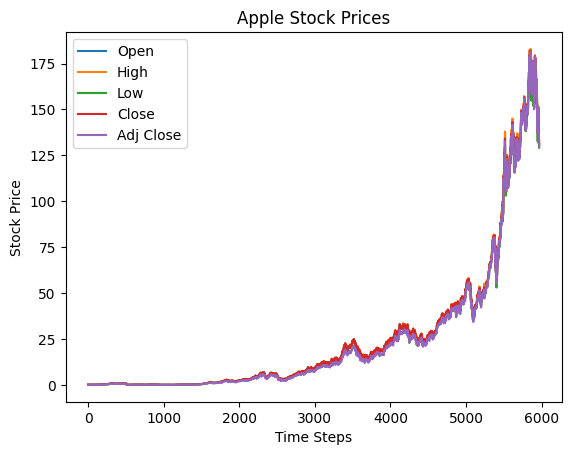

In [ ]:
data[col].plot()
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.title("Apple Stock Prices")

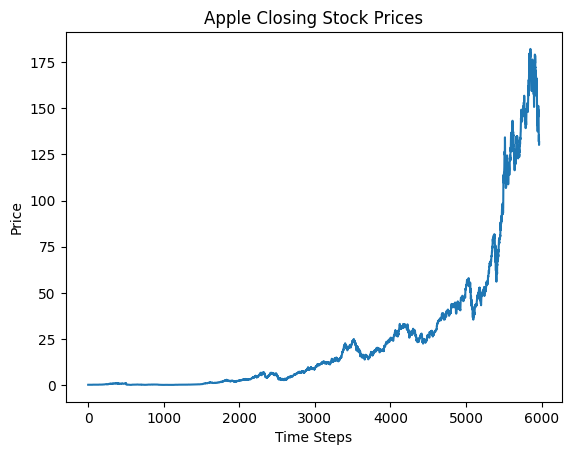

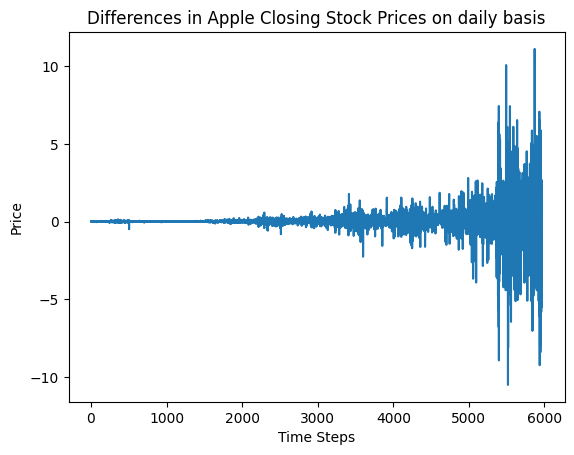

In [ ]:
data['Close'].plot()
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Apple Closing Stock Prices")
plt.show()

(data['Close']-data['Close'].shift(1)).plot()
plt.xlabel("Time Steps")
plt.ylabel("Price")
plt.title("Differences in Apple Closing Stock Prices on daily basis")
plt.show()

In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


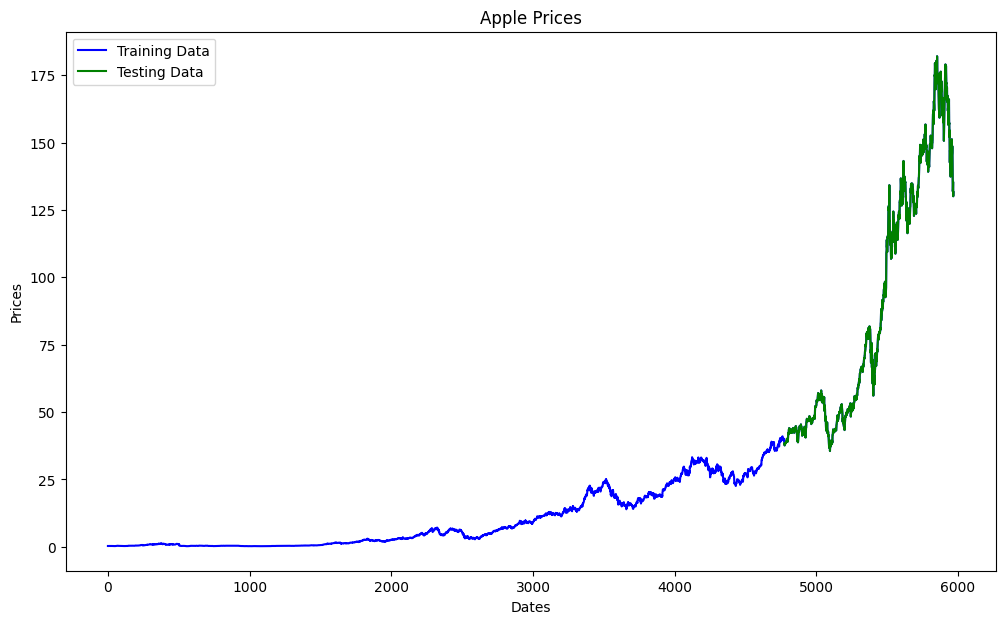

In [ ]:
train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]

plt.figure(figsize=(12,7))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(data['Close'], 'blue', label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
plt.legend()

Predictions generated: 1194


Mean Squared Error (MSE): 4.0204
Mean Absolute Error (MAE): 1.3054
R² Score: 0.9980

SARIMAX Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5968
Model:               SARIMAX(5, 1, 0)   Log Likelihood              -46194.048
Date:                Wed, 20 Aug 2025   AIC                          92400.097
Time:                        16:08:24   BIC                          92440.261
Sample:                             0   HQIC                         92414.048
                               - 5968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0128      0.008      1.685      0.092      -0.002       0.028
ar.L2         -0.0241  

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

train_series = train_data['Close'].values
test_series = test_data['Close'].values

# fit initial model
model = ARIMA(train_series, order=(5,1,0))
model_fit = model.fit()

predictions = []

for t in range(len(test_series)):
    # forecast next value
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)

    # update model with the actual observation
    model_fit = model_fit.append([test_series[t]], refit=False)

print("Predictions generated:", len(predictions))

# Evaluation Metrics
y_true = np.array(test_series)
y_pred = np.array(predictions)

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
r2 = r2_score(y_true, y_pred)

# Store results in DataFrame
results_arima = pd.DataFrame({
    "MSE": [mse],
    "RMSE": [rmse],
    "MAE": [mae],
    "MAPE": [mape],
    "R2 Score": [r2]
}, index=["ARIMA"])

print("\nARIMA Model Evaluation:")
print(results_arima)

# Model Summary
print("\nARIMA Model Summary:")
print(model_fit.summary())


Predictions generated: 1194

ARIMA Model Evaluation:
            MSE     RMSE      MAE      MAPE  R2 Score
ARIMA  4.020387  2.00509  1.30541  1.436145  0.998044

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5968
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -46194.048
Date:                Wed, 20 Aug 2025   AIC                          92400.097
Time:                        16:20:43   BIC                          92440.261
Sample:                             0   HQIC                         92414.048
                               - 5968                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0128      

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# import numpy as np

# train_series = train_data['Close'].values
# test_series = test_data['Close'].values

# # fit initial model
# model = SARIMAX(train_series, order=(5,1,0))
# model_fit = model.fit(disp=False)

# predictions = []

# for t in range(len(test_series)):
#     # forecast next value
#     yhat = model_fit.forecast()[0]
#     predictions.append(yhat)

#     # update with the actual observation as 1-element np.array
#     obs = np.array([test_series[t]])
#     model_fit = model_fit.append(obs, refit=False)

# print("Predictions generated:", len(predictions))

# # -------------------------
# # Evaluation Metrics
# # -------------------------
# mse = mean_squared_error(test_series, predictions)
# mae = mean_absolute_error(test_series, predictions)
# r2 = r2_score(test_series, predictions)

# print(f"Mean Squared Error (MSE): {mse:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.4f}")
# print(f"R² Score: {r2:.4f}")

# # -------------------------
# # Model Summary (from the final fit)
# # -------------------------
# print("\nSARIMAX Model Summary:")
# print(model_fit.summary())